In [11]:
from datetime import datetime
from pprint import pprint
import numpy as np
import pandas as pd
import scipy
import pickle

from one.api import ONE
from brainbox.io.one import SessionLoader, EphysSessionLoader
from iblatlas.atlas import AllenAtlas
from brainbox.io.one import SpikeSortingLoader

ba = AllenAtlas(res_um=10)

from brainbox.processing import bincount2D
import seaborn as sns

import matplotlib.pyplot as plt

from os.path import join
import os

from pathlib import Path
from psychedelic_functions import paths

path_dict = paths()

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.colors as mcolors

/home/openlab/anaconda3/envs/iblenv/lib/python3.10/site-packages/one/alf/files.py:10: FutureWarning: `one.alf.files` will be removed in version 3.0. Use `one.alf.path` instead.
  warnings.warn(


In [2]:
mode = 'auto'  # sets mode for all queries (one.seach* methods)
one = ONE(mode=mode)

In [1]:
run -i fetch_spikes.py

/home/openlab/anaconda3/envs/iblenv/lib/python3.10/site-packages/one/alf/files.py:10: FutureWarning: `one.alf.files` will be removed in version 3.0. Use `one.alf.path` instead.
  warnings.warn(
  0%|          | 0/53 [00:00<?, ?it/s]

Good clusters PID7da0f609...: 61 / 1610


  4%|▍         | 2/53 [00:06<02:48,  3.30s/it]

Good clusters PIDb33386fc...: 24 / 1541
Good clusters PIDa4d69060...: 116 / 1670


  6%|▌         | 3/53 [00:11<03:26,  4.13s/it]

Good clusters PIDb0b6a756...: 127 / 1597


  9%|▉         | 5/53 [00:19<03:12,  4.00s/it]

Good clusters PID351ee92a...: 25 / 1528
Good clusters PIDd6970b50...: 63 / 1518


 11%|█▏        | 6/53 [00:24<03:16,  4.18s/it]

Good clusters PID385d74d9...: 156 / 1804


 13%|█▎        | 7/53 [00:28<03:16,  4.28s/it]

Good clusters PIDb74fd045...: 73 / 1621


 15%|█▌        | 8/53 [00:33<03:10,  4.24s/it]

Good clusters PID5ccc2e14...: 72 / 1455


 17%|█▋        | 9/53 [00:36<02:58,  4.07s/it]

Good clusters PID666bcba6...: 153 / 1662


 19%|█▉        | 10/53 [00:42<03:14,  4.53s/it]

Good clusters PID51323b8e...: 118 / 1643


 21%|██        | 11/53 [00:47<03:16,  4.67s/it]

Good clusters PID9bea4082...: 64 / 1589


 23%|██▎       | 12/53 [00:50<02:51,  4.18s/it]

Good clusters PIDf529221f...: 132 / 1679


 25%|██▍       | 13/53 [00:53<02:38,  3.97s/it]

2024-11-29 17:35:34 WARNING  one.py:359  Histology tracing for probe00 does not exist. No channels for probe00
Good clusters PID7911466c...: 143 / 1724


 28%|██▊       | 15/53 [00:56<01:35,  2.51s/it]

Good clusters PID73860622...: 40 / 1521


 30%|███       | 16/53 [01:00<01:52,  3.05s/it]

Good clusters PID83099467...: 138 / 1657


 32%|███▏      | 17/53 [01:05<02:04,  3.45s/it]

2024-11-29 17:35:46 WARNING  one.py:359  Histology tracing for probe01 does not exist. No channels for probe01


 32%|███▏      | 17/53 [01:07<02:23,  4.00s/it]

Good clusters PID47a4c548...: 0 / 1475


KeyError: 'cluster_id'

In [ ]:
pd.read_pickle('/Data/')

In [3]:
df_timings = pd.read_csv('./metadata/protocol_timings.csv')
df_timings['admin_time'] = df_timings['admin_time'].str.split(' ').str[4]
df_timings['admin_time'] = df_timings['admin_time'].str.split('\\').str[0]
df_timings['admin_time'] = np.float64(df_timings['admin_time'].str.split('\n').str[0])
df_timings_spontaneous = df_timings[df_timings['spontaneous_start_01'].notna()]
df_timings_spontaneous = df_timings_spontaneous[df_timings_spontaneous['spontaneous_start_00'].notna()]
# mode = 'remote'  # sets mode for all queries (one.seach* methods)
# one = ONE(mode=mode)
df_timings_spontaneous

,eid,spontaneous_start_00,spontaneous_stop_00,rfm_start_00,rfm_stop_00,replay_start_00,replay_stop_00,spontaneous_start_01,spontaneous_stop_01,rfm_start_01,rfm_stop_01,replay_start_01,replay_stop_01,admin_time
0,d77dd225-f7a9-4d01-996b-82c3ae73d56c,52.456301,352.488467,364.755134,665.820531,3029.724119,1002.943729,3050.437273,3350.486471,3362.753138,3663.834733,4042.941732,3999.650062,1047.0
1,86f743cd-ee0d-4ca5-a107-dca9a0cf3f7a,60.581288,360.630553,372.897220,673.945918,3076.041320,1010.011122,3096.895660,3396.944591,3409.211258,3710.259923,4034.342125,NaN,1111.0
2,4b398979-c54c-498f-a3d4-b201c2285be5,192.993812,493.059209,505.325876,806.408238,3081.895068,1149.644457,3102.680914,3402.730013,3414.996680,3716.062143,4073.404452,4059.372622,1184.0
3,6dc3fee9-6bfc-4daf-a70f-d726ac2fcfde,68.303716,368.352781,380.619448,681.684678,3045.907000,1024.891867,3066.685281,3366.717948,3378.984615,3680.049745,4173.635928,4023.264667,1054.0
8,aff40fef-7ef3-4e7a-9451-f248e6d385db,92.489430,392.555194,404.821861,705.887391,2968.815543,1042.197770,2989.578826,3289.627991,3301.894658,3602.959888,4165.659292,3938.842943,1094.0
11,53d8cb2f-3338-4bcd-81c4-6207b660eba3,85.650914,385.715944,397.982611,699.047941,3006.530638,1042.013455,3027.283022,3327.331420,3339.598087,3640.663117,4009.951331,3983.424584,1146.0
14,debe9833-5c26-4d9e-89ba-c63e07e1db10,74.622784,374.688581,386.955247,688.004046,3049.913766,1023.915832,3070.655451,3370.704449,3382.971116,3684.036313,4039.450215,4020.005393,1073.0
15,7149e0fc-a52d-4e93-849c-edc22d54e7a5,52.628383,352.693514,364.960181,666.025344,2894.814311,1009.286428,2915.548829,3215.597395,3227.864061,3528.929458,3941.145379,3872.214240,1065.0
16,a7a4a70f-57ae-4586-bb2d-37422deca541,68.434236,368.466736,380.733403,681.815431,2986.730052,1024.750581,3007.453605,3307.502203,3319.768870,3620.817902,4000.827944,3963.708290,1121.0
18,e13d0e58-55c8-4787-a716-03549b3d0240,50.254854,350.303653,362.570320,663.635550,2911.388387,999.701986,2932.157868,3232.223232,3244.489899,3545.538331,3917.679793,3881.635231,1065.0


In [4]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def power_law(x, alpha):
        return 1 / (x ** alpha)

def linear_function(x, alpha, b):
        return alpha * x + b

def exponential (x, alpha, b):
        return alpha * np.exp(b*x)

def load_good_units (pid):
        print ('pid:', pid)
        eid_timings = df_timings_spontaneous.loc[df_timings_spontaneous['eid']==eid]
        dir = Path (f'./Data/eids/{eid}/{pid}')
        dir.mkdir (parents=True, exist_ok=True)

        spikes_file = Path (f'./Data/eids/{eid}/{pid}/spikes.pkl')
        clusters_file = Path (f'./Data/eids/{eid}/{pid}/clusters.pkl')
        channels_file = Path (f'./Data/eids/{eid}/{pid}/channels.pkl')

        if spikes_file.exists() and clusters_file.exists() and channels_file.exists():
                with spikes_file.open('rb') as f:
                        print (f'Loading spikes from file at ./Data/eids/{eid}/{pid}/spikes.pkl')
                        spikes = pickle.load(f)
                with clusters_file.open('rb') as f:
                        print (f'Loading clusters from file at ./Data/eids/{eid}/{pid}/clusters.pkl')
                        clusters = pickle.load(f)
                with channels_file.open('rb') as f:
                        print (f'Loading channels from file at ./Data/eids/{eid}/{pid}/channels.pkl')        
                        channels = pickle.load(f)    
        else:
                print('No local files found, loading with SpikeSortingLoader')
                sl = SpikeSortingLoader(pid=pid, one=one, atlas=ba)
                spikes, clusters, channels = sl.load_spike_sorting()
                clusters = sl.merge_clusters(spikes, clusters, channels)
                with spikes_file.open('wb') as f:
                        print (f'Saving spikes to file at ./Data/eids/{eid}/{pid}/spikes.pkl')
                        pickle.dump(spikes, f)
                with clusters_file.open('wb') as f:
                        print (f'Saving clusters to file at ./Data/eids/{eid}/{pid}/clusters.pkl')
                        pickle.dump(clusters, f)
                with channels_file.open('wb') as f:
                        print (f'Saving channels to file at ./Data/eids/{eid}/{pid}/channels.pkl')        
                        pickle.dump(channels, f)

        print('Finished loading spikes, clusters and channels')

        # Only keep IBL good neurons
        spikes.times = spikes.times[np.isin(spikes.clusters, clusters.cluster_id[clusters.label == 1])]
        spikes.depths = spikes.depths[np.isin(spikes.clusters, clusters.cluster_id[clusters.label == 1])]
        spikes.clusters = spikes.clusters[np.isin(spikes.clusters, clusters.cluster_id[clusters.label == 1])]
        return spikes, clusters, channels

def plot_rasters (pid, spikes, clusters, channels, eid_timings):
        # Convert to mm
        spikes.depths = spikes.depths / 1000
        # Get spike raster
        iok = ~np.isnan(spikes.depths)
        R, times, depths = bincount2D(spikes.times[iok], spikes.depths[iok], xbin=0.01, ybin=0.02, weights=None)
        # %% Plot figure
        f, ax1 = plt.subplots(1, 1, figsize=(5, 2.5), dpi=300)
        ax1.imshow(R, aspect='auto', cmap='binary', vmin=0, vmax=np.std(R),
                extent=np.r_[times[[0, -1]], depths[[0, -1]]], origin='upper')
        ax1.set(ylim=[0, 4], ylabel='Depth (mm)')
        #ax1.set_title('Awake', color=colors['awake'], fontweight='bold')
        ax1.set(xticks=[ax1.get_xlim()[0] + 60, ax1.get_xlim()[0] + 660])
        ax1.text(ax1.get_xlim()[0] + 350, 4.3, '10 min', ha='center', va='center')
        ax1.axes.get_xaxis().set_visible(False)
        ax1.invert_yaxis()

        for i in np.arange(1, channels['acronym'].shape[0], 50):
                ax1.text(ax1.get_xlim()[-1]+50, channels['axial_um'][channels['acronym'].shape[0] - i] / 1000,
                channels['acronym'][i], fontsize=8)
        for key in eid_timings:
                print (key, ':', eid_timings[key].values[0])
                if key != 'eid':
                        ax1.axvline(eid_timings[key].values[0], color = "red", linewidth=0.2) # add linewidth parameter to make lines thinner
                        ax1.text(eid_timings[key].values[0], ax1.get_ylim()[0]-4, key, ha ='left', rotation = 45 ,color = "red", fontsize = 3) # adjust position and rotation of text
        plt.tight_layout()
        sns.despine(trim=True, offset=2)

        # plt.savefig(join(path_dict['fig_path'], 'example_raster.pdf'))
        start_index_00 = find_nearest(times, eid_timings['spontaneous_start_00'].values[0])
        stop_index_00 = find_nearest(times, eid_timings['spontaneous_stop_00'].values[0])
        start_index_01 = find_nearest(times, eid_timings['spontaneous_start_01'].values[0])
        stop_index_01 = find_nearest(times, eid_timings['spontaneous_stop_01'].values[0])
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

        spontaneous_activity_00 = R[:, start_index_00:stop_index_00]
        spontaneous_activity_01 = R[:, start_index_01:stop_index_01]


        im1 = ax1.imshow(spontaneous_activity_00, 
                aspect='auto', cmap='binary', vmin=0, vmax=np.std(R), 
                extent=np.r_[times[[start_index_00, stop_index_00-1]], depths[[0, -1]]], origin='upper')
        ax1.set_title('Spontaneous Activity #1')

        im2 = ax2.imshow(spontaneous_activity_01, 
                aspect='auto', cmap='binary', vmin=0, vmax=np.std(R), 
                extent=np.r_[times[[start_index_01, stop_index_01-1]], depths[[0, -1]]], origin='upper')
        ax2.set_title('Spontaneous Activity #2')

        # display the plot
        plt.show()
        plt.close()

def load_spontaneous_activity(spikes, eid_timings):
    # Convert AlfBunch to DataFrame
    spikes_df = pd.DataFrame(spikes)
    
    select_00 = (spikes_df.times >= eid_timings['spontaneous_start_00'].values[0]) & \
                (spikes_df.times <= eid_timings['spontaneous_stop_00'].values[0])
    select_01 = (spikes_df.times >= eid_timings['spontaneous_start_01'].values[0]) & \
                (spikes_df.times <= eid_timings['spontaneous_stop_01'].values[0])

    spontaneous_activity_00 = spikes_df.loc[select_00]
    spontaneous_activity_01 = spikes_df.loc[select_01]

    return spontaneous_activity_00, spontaneous_activity_01

In [5]:
def run_PCA(spontaneous_activity_00, spontaneous_activity_01):
        # perform PCA to get the first three components
        pca = PCA(n_components=20)
        pca_result_00 = pca.fit_transform(spontaneous_activity_00.T)  # transpose to make timestamp as row
        explained_variance_00 = pca.explained_variance_ratio_ # save the explained variance for 00

        pca_result_01 = pca.fit_transform(spontaneous_activity_01.T)  # transpose to make timestamp as row
        explained_variance_01 = pca.explained_variance_ratio_ # save the explained variance for 01

        fig = plt.figure(figsize = (16,8))


        # Create a 2x2 subplot grid
        fig, ax = plt.subplots(2, 2, figsize=(16,16))

        # create the first 3D subplot
        ax1 = fig.add_subplot(2, 2, 3, projection='3d')
        ax1.plot(pca_result_00[:,0], pca_result_00[:,1], pca_result_00[:,2], marker = 'o', alpha= 0.1)
        ax1.set_title('PCA trajectory of spontaneous activity 00 \n Pre-LSD')
        ax1.set_xlabel('PC1')
        ax1.set_ylabel('PC2')
        ax1.set_zlabel('PC3')

        # create the second 3D subplot
        ax2 = fig.add_subplot(2, 2, 4, projection='3d')
        ax2.plot(pca_result_01[:,0], pca_result_01[:,1], pca_result_01[:,2], marker = 'o', alpha= 0.1)
        ax2.set_title('PCA trajectory of spontaneous activity 01 \n Post-LSD')
        ax2.set_xlabel('PC1')
        ax2.set_ylabel('PC2')
        ax2.set_zlabel('PC3')

        # Create the first scree plot
        ax[0, 0].bar(np.arange(1,len(explained_variance_00)+1), explained_variance_00)
        ax[0, 0].set_title('Scree plot of spontaneous activity 00 \n Pre-LSD')
        ax[0, 0].set_xlabel('Principal Component')
        ax[0, 0].set_ylabel('Variance Explained (%)')

        # Create the second scree plot 
        ax[0, 1].bar(np.arange(1,len(explained_variance_01)+1), explained_variance_01)
        ax[0, 1].set_title('Scree plot of spontaneous activity 01 \n Post-LSD')
        ax[0, 1].set_xlabel('Principal Component')
        ax[0, 1].set_ylabel('Variance Explained (%)')

        plt.tight_layout()
        plt.show()
        plt.close()


        
        # Create plot
        fig, ax = plt.subplots(figsize=(10,8))

        # Add plots
        ax.plot(np.arange(1,len(explained_variance_00)+1), explained_variance_00, marker='o', label='Pre-LSD')
        ax.plot(np.arange(1,len(explained_variance_01)+1), explained_variance_01, marker='o', label='Post-LSD')

        # Set labels and title
        ax.set_title('Scree plot of spontaneous activity \n Pre-LSD vs Post-LSD')
        ax.set_xlabel('Principal Component')
        ax.set_ylabel('Variance Explained (%)')

        # Add legend to differentiate the lines
        ax.legend()

        # Show the plot
        plt.show()
        plt.close()


        # # Calculate power-law fit alpha for each dataset
        # alpha_00, _ = scipy.optimize.curve_fit(power_law, np.arange(1,len(explained_variance_00)+1), explained_variance_00) 
        # alpha_01, _ = scipy.optimize.curve_fit(power_law, np.arange(1,len(explained_variance_01)+1), explained_variance_01)

        # Calculate power-law fit alpha for each dataset
        [alpha_00, b00], _ = scipy.optimize.curve_fit(exponential, np.arange(1,len(explained_variance_00)+1), explained_variance_00) 
        [alpha_01, b01], _ = scipy.optimize.curve_fit(exponential, np.arange(1,len(explained_variance_01)+1), explained_variance_01)


        alphas = [[alpha_00, b00], [alpha_01, b01]]

        # x array for generating y_fit
        x_fit = np.arange(1, len(explained_variance_00)+1)

        # Generate prediction lines
        y_fit_00 = exponential(x_fit, alpha_00, b00)
        y_fit_01 = exponential(x_fit, alpha_01, b01)

        # Create the plot
        fig, ax = plt.subplots(figsize=(10,8))

        # Add original data plots
        ax.plot(x_fit, explained_variance_00, marker='o', label='Pre-LSD')
        ax.plot(x_fit, explained_variance_01, marker='o', label='Post-LSD')

        # Add prediction lines
        ax.plot(x_fit, y_fit_00, color='blue', label=f'Power-law fit Pre-LSD: alpha={alpha_00:.2f}')
        ax.plot(x_fit, y_fit_01, color='orange', label=f'Power-law fit Post-LSD: alpha={alpha_01:.2f}')

        # Set labels and title
        ax.set_title('Scree plot of spontaneous activity \n Pre-LSD vs Post-LSD')
        ax.set_xlabel('Principal Component')
        ax.set_ylabel('Variance Explained (%)')

        # Add legend to differentiate the lines
        ax.legend()

        # Show the plot
        plt.show()
        plt.close()
        return alphas, pca_result_00, explained_variance_00, pca_result_01, explained_variance_01

In [7]:
pid = '7da0f609-e432-4773-9d6a-40e06a3b206a'
sl = SpikeSortingLoader(pid=pid, one=one, atlas=ba)
spikes, clusters, channels = sl.load_spike_sorting()

pid: 7da0f609-e432-4773-9d6a-40e06a3b206a
Loading spikes from file at ./Data/eids/d77dd225-f7a9-4d01-996b-82c3ae73d56c/7da0f609-e432-4773-9d6a-40e06a3b206a/spikes.pkl
Loading clusters from file at ./Data/eids/d77dd225-f7a9-4d01-996b-82c3ae73d56c/7da0f609-e432-4773-9d6a-40e06a3b206a/clusters.pkl
Loading channels from file at ./Data/eids/d77dd225-f7a9-4d01-996b-82c3ae73d56c/7da0f609-e432-4773-9d6a-40e06a3b206a/channels.pkl
Finished loading spikes, clusters and channels
eid : d77dd225-f7a9-4d01-996b-82c3ae73d56c
spontaneous_start_00 : 52.45630068464166
spontaneous_stop_00 : 352.48846745576327
rfm_start_00 : 364.75513434495394
rfm_stop_00 : 665.8205311160766
replay_start_00 : 3029.72411862303
replay_stop_00 : 1002.943728931003
spontaneous_start_01 : 3050.43727260764
spontaneous_stop_01 : 3350.4864710087613
rfm_start_01 : 3362.753137897952
rfm_stop_01 : 3663.834733049074
replay_start_01 : 4042.941732064043
replay_stop_01 : 3999.650061664
admin_time : 1047.0


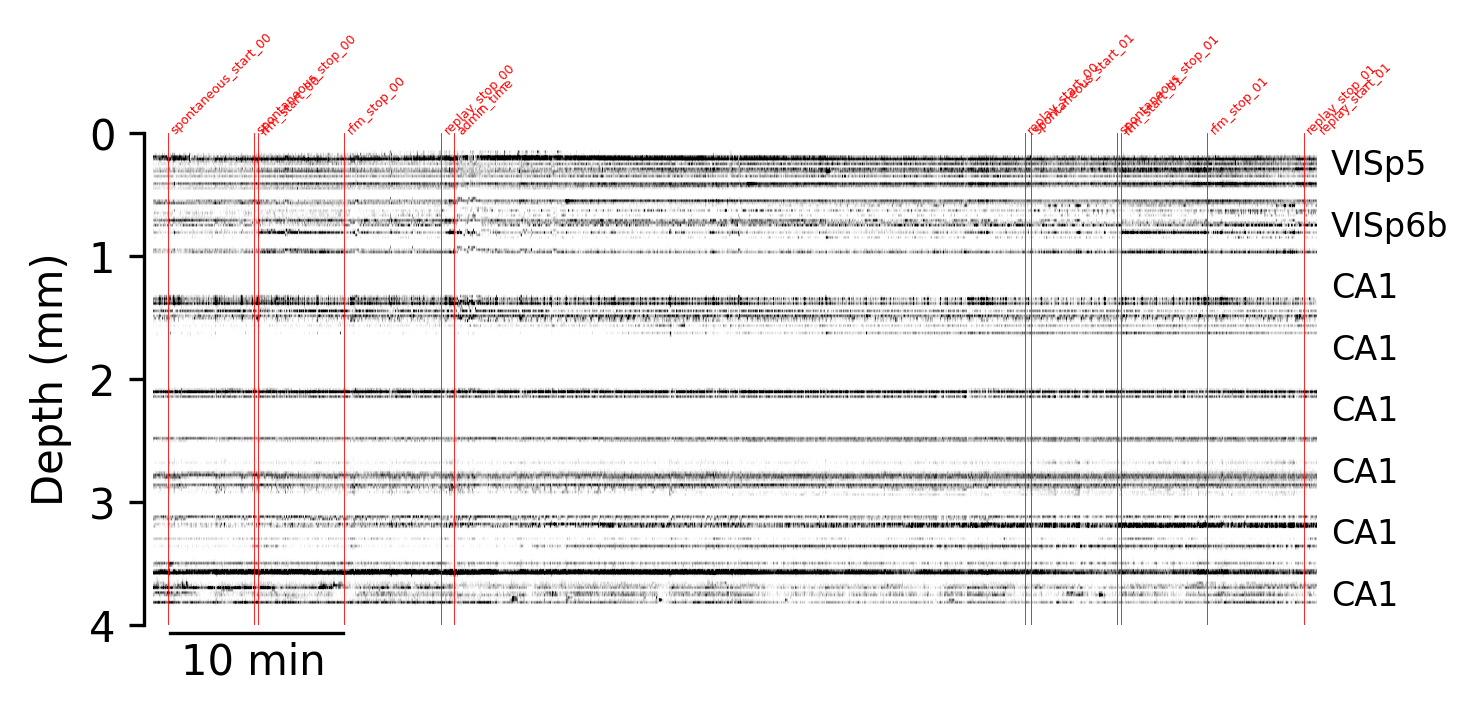

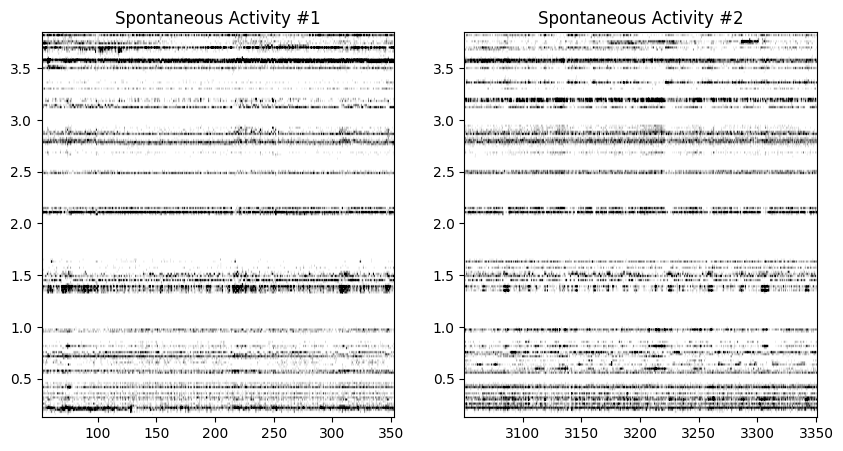

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [25]:
for eid in df_timings_spontaneous['eid']:
    eid_timings = df_timings_spontaneous[df_timings_spontaneous['eid']==eid]
    for pid in one.eid2pid(eid)[0]:
        spikes, clusters, channels = load_good_units(pid)
        plot_rasters (pid, spikes, clusters, channels, eid_timings)
        spontaneous_activity_00, spontaneous_activity_01 = load_spontaneous_activity (spikes, eid_timings)
        run_PCA(spontaneous_activity_00, spontaneous_activity_01)
        break
    break


In [ ]:
power_laws = []
per_session_pca = []
PCAs_per_eid = {}
for eid in df_timings_spontaneous['eid']:
    try:
        spontaneous_activity_00, spontaneous_activity_01 = load_rasters(eid)
        PCAs_per_eid[f'{eid}'] = run_PCA(spontaneous_activity_00, spontaneous_activity_01)
        power_laws.append(alphas)
        per_session_pca.append (alphas, pca_result_00, explained_variance_00, pca_result_01, explained_variance_01)
        break
    except AttributeError:
        print(f"An error occurred with {eid}. Skipping to the next one.")
        continue

NameError: name 'load_rasters' is not defined

ValueError: x and y must be the same size

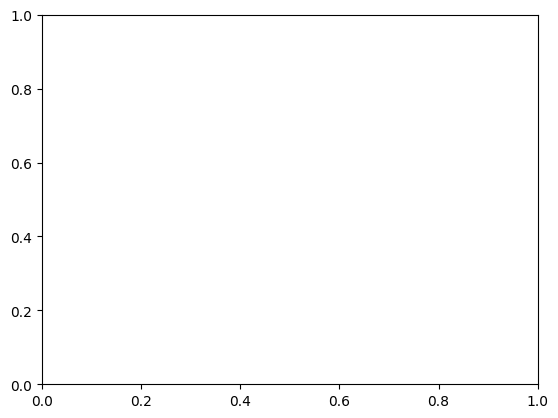

In [214]:
import matplotlib.pyplot as plt
import numpy as np

# Generate array for x coordinates
x_coords_pre = [1] * len(power_laws)  # Let's say 'Pre-LSD' points are at x=1
x_coords_post = [2] * len(power_laws)  # and 'Post-LSD' points are at x=2

# Extract 'Pre-LSD' and 'Post-LSD' points
pre_lsd = [entry[0] for entry in power_laws]
post_lsd = [entry[1] for entry in power_laws]

# Calculate the mean (average) values
mean_pre_lsd = np.mean(pre_lsd)
mean_post_lsd = np.mean(post_lsd)

# Create a new figure and axis
fig, ax = plt.subplots()

# Add scatter plots
ax.scatter(x_coords_pre, pre_lsd, label='Pre-LSD')
ax.scatter(x_coords_post, post_lsd, label='Post-LSD')

# Connect each pair of points with a line
for i in range(len(pre_lsd)):
    ax.plot([1, 2], [pre_lsd[i], post_lsd[i]], color='grey', linestyle='-', linewidth=1)

# Add average points to the plot
ax.scatter(1, mean_pre_lsd, color='red', label='Average Pre-LSD')
ax.scatter(2, mean_post_lsd, color='red', label='Average Post-LSD')

# Connect average points with a line
ax.plot([1, 2], [mean_pre_lsd, mean_post_lsd], color='red')

# Set title and labels
ax.set_title('Power law fit - Alpha estimates for each session')
ax.set_xlabel('Condition')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Pre-LSD', 'Post-LSD'])
ax.set_ylabel('Alpha estimate')

# Add legend and show plot
ax.legend()
plt.show()


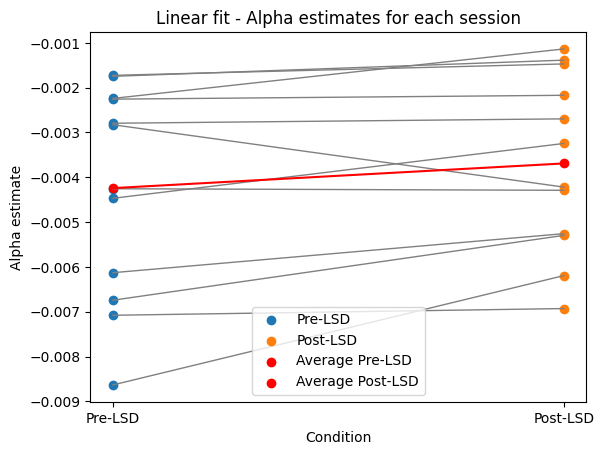

In [213]:
import matplotlib.pyplot as plt
import numpy as np

# Generate array for x coordinates
x_coords_pre = [1] * len(power_laws)  # Let's say 'Pre-LSD' points are at x=1
x_coords_post = [2] * len(power_laws)  # and 'Post-LSD' points are at x=2

# Extract 'Pre-LSD' and 'Post-LSD' points
pre_lsd = [entry[0][0] for entry in power_laws]
post_lsd = [entry[1][0] for entry in power_laws]

# Calculate the mean (average) values
mean_pre_lsd = np.mean(pre_lsd)
mean_post_lsd = np.mean(post_lsd)

# Create a new figure and axis
fig, ax = plt.subplots()

# Add scatter plots
ax.scatter(x_coords_pre, pre_lsd, label='Pre-LSD')
ax.scatter(x_coords_post, post_lsd, label='Post-LSD')

# Connect each pair of points with a line
for i in range(len(pre_lsd)):
    ax.plot([1, 2], [pre_lsd[i], post_lsd[i]], color='grey', linestyle='-', linewidth=1)

# Add average points to the plot
ax.scatter(1, mean_pre_lsd, color='red', label='Average Pre-LSD')
ax.scatter(2, mean_post_lsd, color='red', label='Average Post-LSD')

# Connect average points with a line
ax.plot([1, 2], [mean_pre_lsd, mean_post_lsd], color='red')

# Set title and labels
ax.set_title('Linear fit - Alpha estimates for each session')
ax.set_xlabel('Condition')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Pre-LSD', 'Post-LSD'])
ax.set_ylabel('Alpha estimate')

# Add legend and show plot
ax.legend()
plt.show()


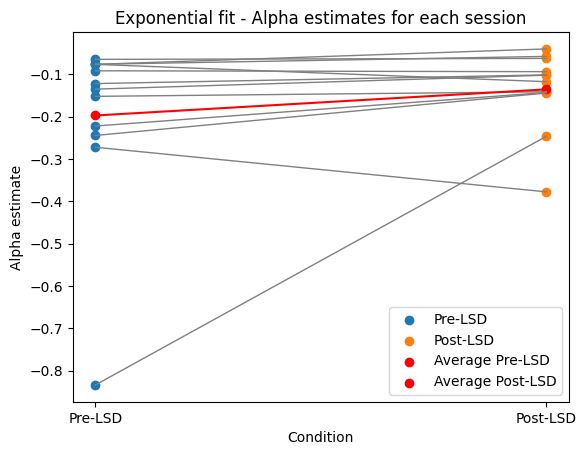

In [219]:
import matplotlib.pyplot as plt
import numpy as np

# Generate array for x coordinates
x_coords_pre = [1] * len(power_laws)  # Let's say 'Pre-LSD' points are at x=1
x_coords_post = [2] * len(power_laws)  # and 'Post-LSD' points are at x=2

# Extract 'Pre-LSD' and 'Post-LSD' points
pre_lsd = [entry[0][1] for entry in power_laws]
post_lsd = [entry[1][1] for entry in power_laws]

# Calculate the mean (average) values
mean_pre_lsd = np.mean(pre_lsd)
mean_post_lsd = np.mean(post_lsd)

# Create a new figure and axis
fig, ax = plt.subplots()

# Add scatter plots
ax.scatter(x_coords_pre, pre_lsd, label='Pre-LSD')
ax.scatter(x_coords_post, post_lsd, label='Post-LSD')

# Connect each pair of points with a line
for i in range(len(pre_lsd)):
    ax.plot([1, 2], [pre_lsd[i], post_lsd[i]], color='grey', linestyle='-', linewidth=1)

# Add average points to the plot
ax.scatter(1, mean_pre_lsd, color='red', label='Average Pre-LSD')
ax.scatter(2, mean_post_lsd, color='red', label='Average Post-LSD')

# Connect average points with a line
ax.plot([1, 2], [mean_pre_lsd, mean_post_lsd], color='red')

# Set title and labels
ax.set_title('Exponential fit - Alpha estimates for each session')
ax.set_xlabel('Condition')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Pre-LSD', 'Post-LSD'])
ax.set_ylabel('Alpha estimate')

# Add legend and show plot
ax.legend()
plt.show()


In [1]:
from one.api import ONE
from brainbox.io.one import SpikeSortingLoader
import matplotlib.pyplot as plt
# from iblutil.util import setup_logger
# setup_logger('ibllib', level='DEBUG')
from iblatlas.atlas import AllenAtlas
ba = AllenAtlas(res_um=10)

one = ONE(base_url='https://alyx.internationalbrainlab.org')
pid = "b0b6a756-8b8a-4cee-9f4f-da0daab9790d"

ssl = SpikeSortingLoader(one=one, pid=pid, atlas = ba)
channels = ssl.load_channels()
spikes, clusters, channels = ssl.load_spike_sorting()
print (spikes)


/home/openlab/anaconda3/envs/iblenv/lib/python3.10/site-packages/one/alf/files.py:10: FutureWarning: `one.alf.files` will be removed in version 3.0. Use `one.alf.path` instead.
  warnings.warn(


Downloading: /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/tmpef7ay2ey/cache.zip Bytes: 137476323


100%|██████████| 131.10763835906982/131.10763835906982 [01:23<00:00,  1.57it/s]


{'depths': array([2704.03369141, 1004.91400146, 1497.98974609, ..., 1045.65966797,
       1837.00073242, 1799.4876709 ]), 'clusters': array([ 989,  356, 1448, ...,  374,  658,  657], dtype=uint32), 'amps': array([9.77885528e-05, 1.13662614e-04, 1.10702692e-04, ...,
       8.04463670e-05, 6.02976212e-05, 8.20995563e-05]), 'times': array([1.22927333e-02, 1.56927336e-02, 1.61260670e-02, ...,
       4.07339144e+03, 4.07339497e+03, 4.07339507e+03])}


In [4]:
def basic_ephys (pid):#, pname, session_path):

    # 1. Load in spikesorting data for pid
    ssl = SpikeSortingLoader(one=one, pid=pid, atlas=ba)
    spikes, clusters, channels = ssl.load_spike_sorting()
    print (spikes)
    clusters = ssl.merge_clusters(spikes, clusters, channels)
    # 2. Evaluate the number of good clusters
    # The spikesortingloader loads data for all clusters (both mua and good) detected by the spikesorter.
    # We can restrict to only the good clusters by finding the clusters with a label of 1
    good_cluster_idx = clusters['label'] == 1
    print (good_cluster_idx)
    clusters_good = {key:val[good_cluster_idx] for key, val in clusters.items()}

    all_clusters = clusters['label'].shape
    good_clusters = clusters_good['label'].shape
    print(f'Total no. of clusters: {all_clusters}')
    print(f'Number of good clusters: {good_clusters}')

    # 3. Find the location of clusters in brain
    # The location of the clusters can be found in the atlas_id (Allen CCF ids) or acronym attributes of the clusters object
    acronyms = clusters_good['acronym']
    unique_acronyms, count = np.unique(acronyms, return_counts=True)
    for a, c in zip(unique_acronyms, count):
        print(f'{a}: {c}')

    # 4. Compute the firing rate of each cluster
    # The firing rate of each cluster can be found in the firing rate atrribute of the clusters object
    firing_rate = clusters_good['firing_rate']

    # To show the interaction between the clusters and the spikes object we will show how you can compute
    # the firing rate from the data

    # To compute the firing rate we first need to compute the number of spikes detected for each cluster
    n_spikes = np.empty((clusters_good['cluster_id'].shape))
    # Loop over the cluster ids
    for i, c in enumerate(clusters_good['cluster_id']):
        # Find location where each cluster id is found in the spikes objects and get the sum
        cidx = np.sum(spikes['clusters'] == c)
        n_spikes[i] = cidx

    # To compute the firing rate we can divide the spike count by the total duration of the recording
    duration = np.max(spikes['times']) - np.min(spikes['times'])
    firing_rate_from_spikes = n_spikes / duration
    # Make sure that the values for firing rates are the same
    np.array_equal(firing_rate_from_spikes, firing_rate)

    # 5. Plot firing rate and brain locations
    clusters_good.keys()
    norm = colors.Normalize(vmin=np.min(firing_rate), vmax=np.max(firing_rate), clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
    firing_rate_cols = mapper.to_rgba(firing_rate)
    fig, axs = plt.subplots(1, 2)
    # Plot the brain regions through which the channels on the insertion pass
    plot_brain_regions(channels['atlas_id'], channel_depths=channels['axial_um'], ax=axs[0])
    # Plot scatter plot of cluster depths vs cluster amp with firing rate encoded in colour
    # Map firing rate values to colours
    norm = colors.Normalize(vmin=np.min(firing_rate), vmax=np.max(firing_rate), clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
    firing_rate_cols = mapper.to_rgba(firing_rate)
    axs[1].scatter(clusters_good['amp_median'] * 1e6, clusters_good['depths'], c=firing_rate_cols)
    axs[1].set_xlabel('Amps (uV)')
    axs[1].get_yaxis().set_visible(False)
    cbar = fig.colorbar(mapper, ax=axs[1])
    cbar.set_label('Firing rate (Hz)')
    plt.show()
    plt.close(fig)
    return {a: c for a, c in zip(unique_acronyms, count)}


In [5]:
import pandas as pd

# Assuming neurons_per_area is your dictionary

# Create a new dictionary where areas will be the keys
areas_dict = {}

for session, areas in neurons_per_area.items():
    for area, neuron_count in areas.items():
        if area not in areas_dict:
            # Create a new dictionary for each new area, with session ids as keys
            areas_dict[area] = {}
        areas_dict[area][session] = neuron_count

# Convert the dictionary to a DataFrame
df = pd.DataFrame(areas_dict).T.fillna(0)
df = df.sort_index()
df = df[df.apply(lambda row: np.count_nonzero(row) >= 3, axis=1)]

print (df)

# Create the heatmap
fig, axs = plt.subplots(1, 2, figsize=(20,20))  # Adjust the size as needed.
heatmap = axs[0].imshow(df, cmap='hot', interpolation='nearest')

# Add labels to the axes
axs[0].set_xticks(range(df.shape[1]))
axs[0].set_xticklabels(df.columns, fontsize=10, rotation=90)
axs[0].set_yticks(range(df.shape[0]))
axs[0].set_yticklabels(df.index, fontsize=10)

# Add a colorbar
cbar = fig.colorbar(heatmap, ax=axs[0], fraction=0.046, pad=0.04)
cbar.set_label('Number of neurons')

# Label axes
axs[0].set_xlabel('Session ID')
axs[0].set_ylabel('Area')

# Create the number map
numbermap = axs[1].imshow(df, cmap='Greys', interpolation='nearest')

# Add labels to the axes
axs[1].set_xticks(range(df.shape[1]))
axs[1].set_xticklabels(df.columns, fontsize=10, rotation=90)
axs[1].set_yticks(range(df.shape[0]))
axs[1].set_yticklabels(df.index, fontsize=10)

# Add the neuron counts as text
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        axs[1].text(j, i, int(df.iloc[i, j]), ha="center", va="center", color="black", fontsize = 6)

# Label axes
axs[1].set_xlabel('Session ID')
axs[1].set_ylabel('Area')

# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'neurons_per_area' is not defined

In [ ]:
dataset = 'spikes.times.npy'
brain_acronym = 'MO'
psychedelic_insertions = one.search_insertions(project=['psychedelics'])
psychedelic_insertions_spikes = one.search_insertions(project=['psychedelics'], datasets=dataset)
psychedelic_insertions_spikes_area = one.search_insertions(project=['psychedelics'], datasets=dataset, atlas_acronym=brain_acronym)

print(f'{len(psychedelic_insertions)-1} insertions in psychedelic project, of which \n{len(psychedelic_insertions_spikes)-1} have a spikes.times.npy file, \n{len(psychedelic_insertions_spikes_area)-1} with areas containing {brain_acronym} in their acronym')
datasets_loaded = {}
neurons_per_area = {}
errored_sessions = []
for pid in psychedelic_insertions_spikes:
    try:
        neurons_per_area[pid] = basic_ephys (pid)    
    except Exception as e:
        errored_sessions.append(pid)
        continue
    # ssl = SpikeSortingLoader(one=one, pid=pid)
    # channels = ssl.load_channels()
    # spikes, clusters, channels = ssl.load_spike_sorting()
    # print (spikes)
#

In [34]:
#From Davide
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


In [9]:

# Keep only spikes from experiments with have valid timings
df_spikes = df_spikes[np.isin(df_spikes['eid'], df_timings.dropna().index)]
# Deicde on time range to consider (& bin width for spike counts)
args = {'start': f'spontaneous_start_00', 'stop': f'spontaneous_stop_00'}
# Get those timings from the timings dataframe
for event in args.values():
        df_spikes[event] = df_spikes['eid'].apply(lambda x: df_timings.loc[x][event])
# Add dt arg to args dict
args['dt'] = 0.1
fig, ax = plt.subplots()
# Pick a single session
for idx, session in df_spikes.groupby('eid'):
    # Get binned counts for the desired interval for each unit
    sp00_spike_counts = session.apply(_get_binned_spike_counts, **args, axis='columns')
    X = np.column_stack(sp00_spike_counts)  # convert it to 2D array w/ units as columns
    # Min-max normalize
    scaler = MinMaxScaler()
    X_norm = scaler.fit_transform(X)
    # PCA
    pca = PCA(n_components=20)
    pca.fit(X_norm)
    # Skree plot
    ax.plot(pca.explained_variance_ratio_)

KeyError: 'eid'

In [ ]:
#From Davide




import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
df_spikes = pd.read_pickle('data/spike_times.pkl')
df_timings = pd.read_csv('metadata/protocol_timings.csv').set_index('eid')
# Keep only spikes from experiments with have valid timings
df_spikes = df_spikes[np.isin(df_spikes['eid'], df_timings.dropna().index)]
# Deicde on time range to consider (& bin width for spike counts)
args = {'start': f'spontaneous_start_00', 'stop': f'spontaneous_stop_00'}
# Get those timings from the timings dataframe
for event in args.values():
        df_spikes[event] = df_spikes['eid'].apply(lambda x: df_timings.loc[x][event])
# Add dt arg to args dict
args['dt'] = 0.1
fig, ax = plt.subplots()
# Pick a single session
for idx, session in df_spikes.groupby('eid'):
    # Get binned counts for the desired interval for each unit
    sp00_spike_counts = session.apply(_get_binned_spike_counts, **args, axis='columns')
    X = np.column_stack(sp00_spike_counts)  # convert it to 2D array w/ units as columns
    # Min-max normalize
    scaler = MinMaxScaler()
    X_norm = scaler.fit_transform(X)
    # PCA
    pca = PCA(n_components=20)
    pca.fit(X_norm)
    # Skree plot
    ax.plot(pca.explained_variance_ratio_)